In [1]:
#importing libraries
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from osgeo import gdal, ogr, osr
import numpy as np
import os
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#boundary
study_map=ogr.Open(f'/content/drive/MyDrive/Portugal ALL/task 3.5 self/flood/wise_vw_surfacewaterbody_basin_Mondego_Contorno.shp')
layer =study_map.GetLayer()
extent = layer.GetExtent()
xmin =extent[0]
xmax =extent[1]
ymin =extent[2]
ymax =extent[3]

boundary=[xmin,xmax,ymin,ymax]

In [4]:
list_a={'soil': {'U': 1,
  'Bh': 2,
  'Bk': 3,
  'Bg': 4,
  'Be': 5,
  'I': 6,
  'WR': 7,
  'Bd': 8,
  'Lc': 9,
  'Re': 10,
  'Lv': 11,
  'Po': 12,
  'Lo': 13,
  'Je': 14,
  'Lg': 15,
  'Lf': 16,
  'Wd': 17,
  'Zg': 18,
  'Vc': 19,
  'Vp': 20,
  'Qc': 21}}

In [4]:
a['soil'].keys()

dict_keys(['U', 'Bh', 'Bk', 'Bg', 'Be', 'I', 'WR', 'Bd', 'Lc', 'Re', 'Lv', 'Po', 'Lo', 'Je', 'Lg', 'Lf', 'Wd', 'Zg', 'Vc', 'Vp', 'Qc'])

In [25]:
keep_val=[ 'U','Bk', 'Bg', 'Be', 'I', 'WR', 'Bd', 'Lc', 'Re', 'Lv']

# CONS FOR CATEGORICAL (by bound file)

In [36]:
soil_file=f'/content/drive/MyDrive/output_13nov/clip_soil_by_bound.tif'
soil_file=gdal.Open(soil_file)
raester_soil_arr=soil_file.GetRasterBand(1).ReadAsArray()
gt =soil_file.GetGeoTransform()
proj =soil_file.GetProjection()

In [37]:
dic=a['soil']
soil_arr=[]
for val in keep_val:
  if val in a['soil']:
    soil_arr.append(dic[val])
soil_arr

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [40]:
mask=np.isin(raester_soil_arr,soil_arr)
cons_soil_arr=mask.astype(int)


(264, 408)

In [41]:
cons_soil_raster_location=f'/content/drive/MyDrive/cons_test/cons_soil.tif'


In [42]:
outds = gdal.GetDriverByName('Gtiff').Create(cons_soil_raster_location, cons_soil_arr.shape[1], cons_soil_arr.shape[0], 1, gdal.GDT_Float64, ['COMPRESS=LZW'])
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outds.GetRasterBand(1).WriteArray(cons_soil_arr)
outds.GetRasterBand(1).SetNoDataValue(np.nan)
outds.FlushCache()
outds = None

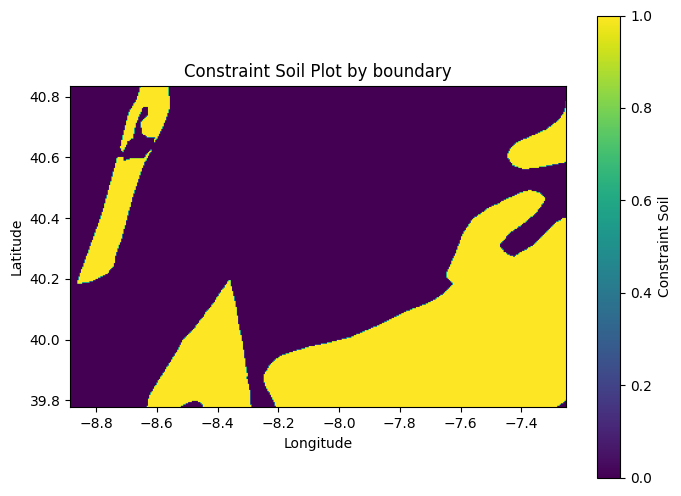

In [56]:
#visualize output file
raster=gdal.Open(f'/content/drive/MyDrive/cons_test/cons_soil.tif')
ar=raster.GetRasterBand(1).ReadAsArray()
plt.figure(figsize=(8,6))
plt.imshow(raster.GetRasterBand(1).ReadAsArray(),extent=(xmin, xmax, ymin, ymax), origin='upper', cmap='viridis')
plt.colorbar(label='Constraint Soil')
plt.title('Constraint Soil Plot by boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# CONS FOR CATEGORICAL (by study area)

In [46]:
soil_file=f'/content/drive/MyDrive/output_13nov/clip_soil_by_study_area.tif'
soil_file=gdal.Open(soil_file)
raester_soil_arr=soil_file.GetRasterBand(1).ReadAsArray()
gt =soil_file.GetGeoTransform()
proj =soil_file.GetProjection()

In [47]:
dic=list_a['soil']
soil_arr=[]
for val in keep_val:
  if val in list_a['soil']:
    soil_arr.append(dic[val])
soil_arr

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [48]:
mask=np.isin(raester_soil_arr,soil_arr)
cons_soil_arr=mask.astype(int)
cons_soil_arr.shape

(264, 408)

In [50]:
cons_soil_raster_location=f'/content/drive/MyDrive/cons_test/cons_soil_s.tif'

In [51]:
outds = gdal.GetDriverByName('Gtiff').Create(cons_soil_raster_location, cons_soil_arr.shape[1], cons_soil_arr.shape[0], 1, gdal.GDT_Float64, ['COMPRESS=LZW'])
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outds.GetRasterBand(1).WriteArray(cons_soil_arr)
outds.GetRasterBand(1).SetNoDataValue(np.nan)
outds.FlushCache()
outds = None

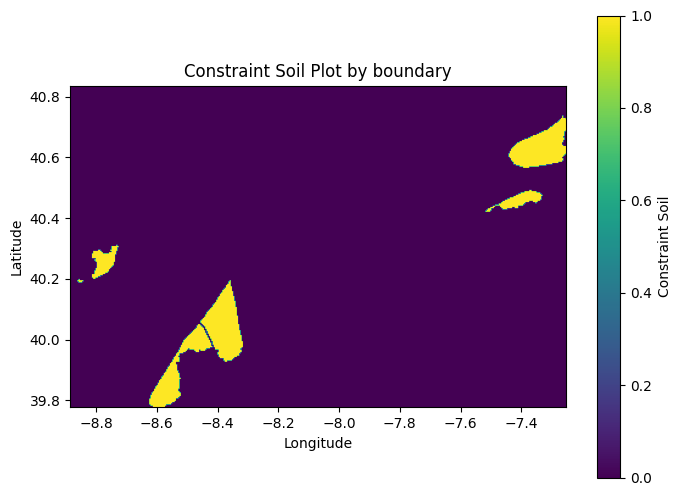

In [52]:
#visualize output file
raster=gdal.Open(f'/content/drive/MyDrive/cons_test/cons_soil_s.tif')
plt.figure(figsize=(8,6))
plt.imshow(raster.GetRasterBand(1).ReadAsArray(),extent=(xmin, xmax, ymin, ymax), origin='upper', cmap='viridis')
plt.colorbar(label='Constraint Soil')
plt.title('Constraint Soil Plot by boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**func constraint map for categorical value**

In [5]:
#raster_file-input clipped raster file name (already saved in the system)
#keep_value-it's a array . the value user want to keep .(given by user)
#dict - value stored for shape file .previously saved in system
#name-file name (user saved this file using this name at first stage)

def cons_cat(raster_file,keep_value,dict,name):

  raster=gdal.Open(raster_file)
  raster_arr=raster.GetRasterBand(1).ReadAsArray()
  gt =raster.GetGeoTransform()
  proj =raster.GetProjection()
  #dic=dict[name]
  arr=[]
  for val in keep_value:
    if val in dict[name]:
      arr.append(dict[name][val])

  #mask
  mask=np.isin(raster_arr,arr)
  cons_arr=mask.astype(int)
  #cons_arr.shape

  #output location
  output_raster_name='cons'+'_'+name
  cons_raster_location=f'/content/drive/MyDrive/cons_test/{output_raster_name}.tif'
  outds = gdal.GetDriverByName('Gtiff').Create(cons_raster_location,cons_arr.shape[1],cons_arr.shape[0],1, gdal.GDT_Float64, ['COMPRESS=LZW'])
  outds.SetGeoTransform(gt)
  outds.SetProjection(proj)
  outds.GetRasterBand(1).WriteArray(cons_arr)
  outds.GetRasterBand(1).SetNoDataValue(np.nan)
  outds.FlushCache()
  outds = None

In [17]:
#2

#raster_file-input clipped raster file name (already saved in the system)
#keep_value-it's a array . the value user want to keep .(given by user)
#dict - value stored for shape file .previously saved in system
#name-file name (user saved this file using this name at first stage)

def cons_cate(raster_file,keep_value,dict,name,output_file):

  raster=gdal.Open(raster_file)
  raster_arr=raster.GetRasterBand(1).ReadAsArray()
  gt =raster.GetGeoTransform()
  proj =raster.GetProjection()
  #dic=dict[name]
  arr=[]
  for val in keep_value:
    if val in dict[name]:
      arr.append(dict[name][val])

  #mask
  mask=np.isin(raster_arr,arr)
  cons_arr=mask.astype(int)
  #cons_arr.shape

  #output location
  output_raster_name='cons'+'_'+name
  #cons_raster_location=f'/content/drive/MyDrive/cons_test/{output_raster_name}.tif'
  outds = gdal.GetDriverByName('Gtiff').Create(output_file,cons_arr.shape[1],cons_arr.shape[0],1, gdal.GDT_Float64, ['COMPRESS=LZW'])
  outds.SetGeoTransform(gt)
  outds.SetProjection(proj)
  outds.GetRasterBand(1).WriteArray(cons_arr)
  outds.GetRasterBand(1).SetNoDataValue(np.nan)
  outds.FlushCache()
  outds = None

**test-1**

In [355]:
raster_file=f'/content/drive/MyDrive/output_13nov/clip_soil_by_study_area.tif'
keep_value=['U','Bk', 'Bg', 'Be', 'I', 'WR', 'Bd', 'Lc', 'Re', 'Lv']

dict=list_a
name='soil'

In [356]:
cons_cat(raster_file,keep_value,dict,name)

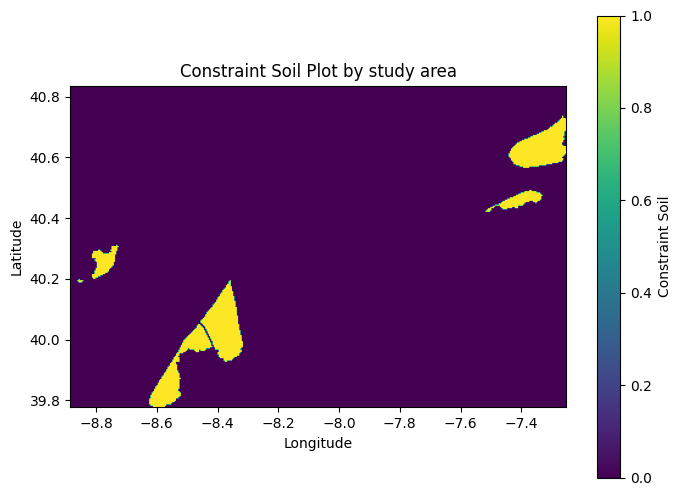

In [357]:
#visualize output file
raster=gdal.Open(f'/content/drive/MyDrive/cons_test/cons_soil.tif')
a_s=raster.GetRasterBand(1).ReadAsArray()
plt.figure(figsize=(8,6))
plt.imshow(raster.GetRasterBand(1).ReadAsArray(),extent=(xmin, xmax, ymin, ymax), origin='upper', cmap='viridis')
plt.colorbar(label='Constraint Soil')
plt.title('Constraint Soil Plot by study area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**test-2**

In [359]:
raster_file=f'/content/drive/MyDrive/output_13nov/clip_soil_by_bound.tif'
keep_value=['U','Bk', 'Bg', 'Be', 'I', 'WR', 'Bd', 'Lc', 'Re', 'Lv']
dict=list_a
name='soil'

In [360]:
cons_cat(raster_file,keep_value,dict,name)

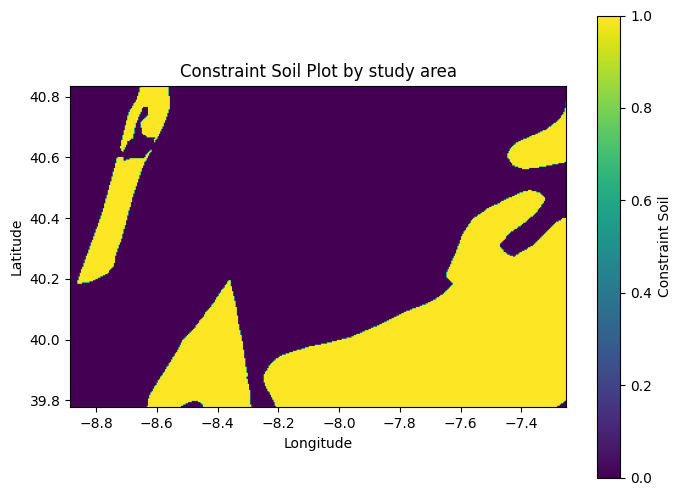

In [362]:
#visualize output file
raster=gdal.Open(f'/content/drive/MyDrive/cons_test/cons_soil.tif')
a_s=raster.GetRasterBand(1).ReadAsArray()
plt.figure(figsize=(8,6))
plt.imshow(raster.GetRasterBand(1).ReadAsArray(),extent=(xmin, xmax, ymin, ymax), origin='upper', cmap='viridis')
plt.colorbar(label='Constraint Soil')
plt.title('Constraint Soil Plot by study area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [143]:
a_s.shape

(264, 408)

# cons for nume

In [6]:
#lower sign -user give the operate but we need to convert it .(the options are -less than, less than equal, greater than, greater than equal)
#lower_bound -given by user
#upper_sign-user give the operate but we need to convert it .(the options are -less than, less than equal, greater than, greater than equal)
#raster_file -clipped raster file saved in the system
#output_file -the save constraint file location


def cons_nume(lower_sign,lower_bound,upper_bound,upper_sign,raster_file,output_file):
  raster=gdal.Open(raster_file)
  raster_arr=raster.GetRasterBand(1).ReadAsArray()
  gt =raster.GetGeoTransform()
  proj =raster.GetProjection()

  #manipulation
  if ((lower_sign=='less than') & (upper_sign=='greater than')):
    mask =(raster_arr > upper_bound) | (raster_arr < lower_bound)
    const_arr=np.where(mask, 1, 0)

  elif ((lower_sign=='less than equal') & (upper_sign=='greater than')):
    mask =(raster_arr > upper_bound) | (raster_arr <= lower_bound)
    const_arr=np.where(mask, 1, 0)

  elif ((lower_sign=='less than') & (upper_sign=='greater than equal')):
    mask =(raster_arr >= upper_bound) | (raster_arr < lower_bound)
    const_arr=np.where(mask, 1, 0)

  elif ((lower_sign=='less than equal') & (upper_sign=='greater than equal')):
    mask =(raster_arr >= upper_bound) | (raster_arr <= lower_bound)
    const_arr=np.where(mask, 1, 0)

  elif ((lower_sign=='greater than') & (upper_sign=='less than')):
    mask =(raster_arr < upper_bound) & (raster_arr > lower_bound)
    const_arr=np.where(mask, 1, 0)

  elif ((lower_sign=='greater than equal') & (upper_sign=='less than')):
    mask =(raster_arr < upper_bound) & (raster_arr >= lower_bound)
    const_arr=np.where(mask, 1, 0)

  elif ((lower_sign=='greater than') & (upper_sign=='less than equal')):
    mask =(raster_arr <= upper_bound) & (raster_arr > lower_bound)
    const_arr=np.where(mask, 1, 0)

  elif ((lower_sign=='greater than equal') & (upper_sign=='less than equal')):
    mask =(raster_arr <= upper_bound) & (raster_arr >= lower_bound)
    const_arr=np.where(mask, 1, 0)
  else:
    print('problem')

  outds = gdal.GetDriverByName('Gtiff').Create(output_file,const_arr.shape[1], const_arr.shape[0], 1, gdal.GDT_Float64, ['COMPRESS=LZW'])
  outds.SetGeoTransform(gt)
  outds.SetProjection(proj)
  outds.GetRasterBand(1).WriteArray(const_arr)
  outds.GetRasterBand(1).SetNoDataValue(np.nan)
  outds.FlushCache()
  outds = None




In [393]:
raster_file=f'/content/drive/MyDrive/output_13nov/clip_drainage_density_by_study_area.tif'
output_file=f'/content/drive/MyDrive/cons_test/cons_dd3.tif'
upper_sign='less than equal'
lower_bound=20
lower_sign='greater than'
upper_bound=50

In [394]:
cons_nume(lower_sign,lower_bound,upper_bound,upper_sign,raster_file,output_file)

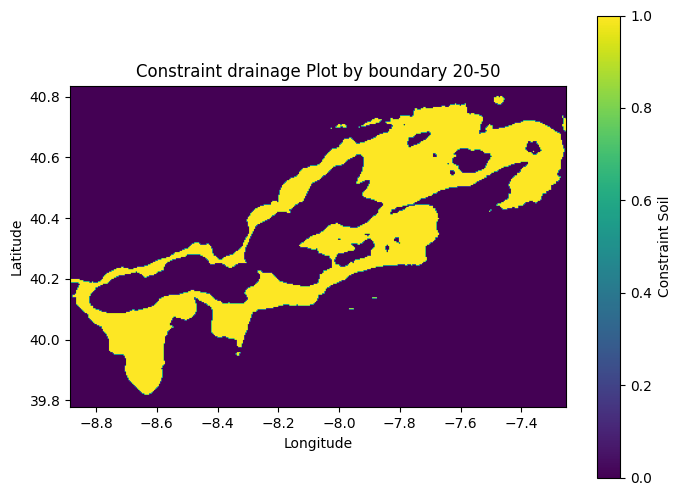

In [396]:
raster=gdal.Open(f'/content/drive/MyDrive/cons_test/cons_dd3.tif')
ar1=raster.GetRasterBand(1).ReadAsArray()
plt.figure(figsize=(8,6))
plt.imshow(raster.GetRasterBand(1).ReadAsArray(),extent=(xmin, xmax, ymin, ymax), origin='upper', cmap='viridis')
plt.colorbar(label='Constraint drainage')
plt.title('Constraint drainage Plot by boundary 20-50')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [321]:
ar1.shape

(264, 408)

**test-2**

In [397]:
raster_file=f'/content/drive/MyDrive/output_13nov/clip_drainage_density_by_study_area.tif'
output_file=f'/content/drive/MyDrive/cons_test/cons_dd4.tif'
upper_bound=50
upper_sign='greater than'
lower_bound=20
lower_sign='less than equal'


In [398]:
cons_nume(lower_sign,lower_bound,upper_bound,upper_sign,raster_file,output_file)

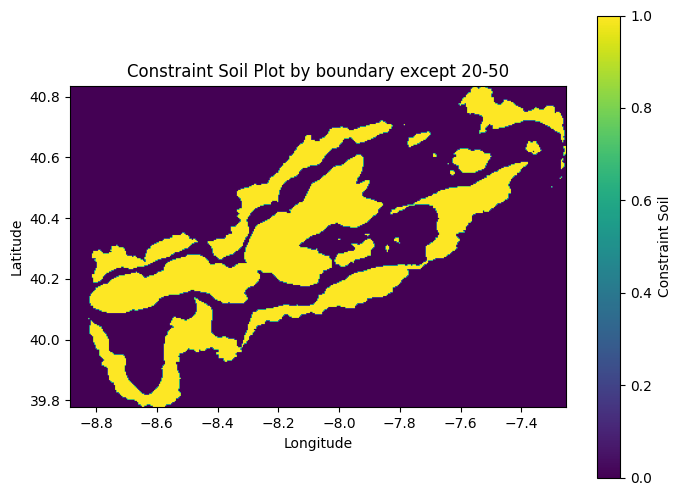

In [399]:
raster=gdal.Open(f'/content/drive/MyDrive/cons_test/cons_dd4.tif')
ar2=raster.GetRasterBand(1).ReadAsArray()
plt.figure(figsize=(8,6))
plt.imshow(raster.GetRasterBand(1).ReadAsArray(),extent=(xmin, xmax, ymin, ymax), origin='upper', cmap='viridis')
plt.colorbar(label='Constraint Soil')
plt.title('Constraint Soil Plot by boundary except 20-50')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [127]:
ar2.shape

(264, 408)

# Make it Functioanl

In [24]:
all_file=[f'/content/drive/MyDrive/output_13nov/clip_drainage_density_by_study_area.tif',f'/content/drive/MyDrive/output_13nov/clip_soil_by_study_area.tif']


In [26]:
#only constraint mapping

def overlay_constraint_raster(all_file,dict):

  for file in all_file:
    print(file)
    name=file.split('.')[0].split('/')[-1]   #change according to location
    name=name.split('_')[1]
    #print(name)
    print(f'This is {name} file')
    if name in dict:
      #use categorical function
      print(f'This is {name} file')
      keep_val=input('Write down the category names that you want to keep in constraint mapping.use comma seperated value')
      keep_value=keep_val.split(',')
      #call the function
      #cons_cat(file,keep_value,dict,name)
      output_name='cons'+'_'+name
      output_file=f'/content/drive/MyDrive/cons_test/{output_name}.tif'

      cons_cate(file,keep_value,dict,name,output_file)

    else:    #numerical

      lower_bound=float(input('Insert your lower bound'))
      lower_sign=input('insert your lower sign')
      upper_sign=input('insert your upper sign')
      upper_bound=float(input('insert your upper bound'))

      output_name='cons'+'_'+name
      output_file=f'/content/drive/MyDrive/cons_test/{output_name}.tif'
      cons_nume(lower_sign,lower_bound,upper_bound,upper_sign,file,output_file)





  print('end')

#f'/content/drive/MyDrive/output_13nov/clip_soil_by_study_area.tif'




In [412]:
#  U,Bk,Bg,Be,I,WR,Bd,Lc,Re,Lv
# upper_sign='greater than equal'  upper_bound=50  upper_sign='greater than'  lower_bound=20    lower_sign='less than equal'

In [27]:
overlay_constraint_raster(all_file,list_a)

/content/drive/MyDrive/output_13nov/clip_drainage_density_by_study_area.tif
This is drainage file
Insert your lower bound20
insert your lower signless than
insert your upper signgreater than equal
insert your upper bound50
/content/drive/MyDrive/output_13nov/clip_soil_by_study_area.tif
This is soil file
This is soil file
Write down the category names that you want to keep in constraint mapping.use comma seperated valueU,Bk,Bg,Be,I,WR,Bd,Lc,Re,Lv
end


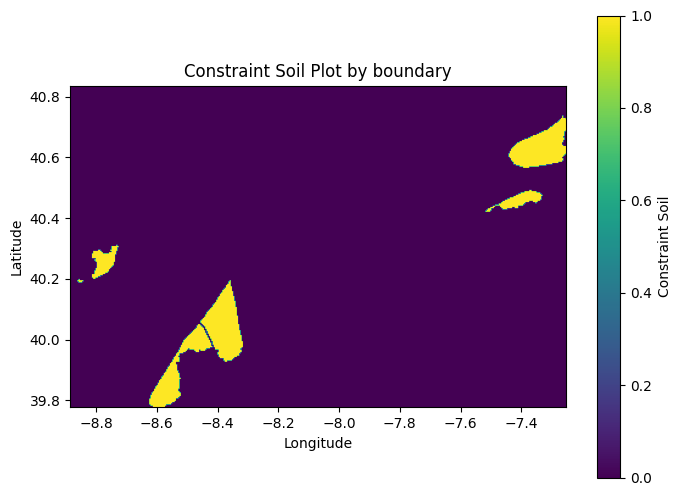

In [28]:
raster=gdal.Open(f'/content/drive/MyDrive/cons_test/cons_soil.tif')
a_s=raster.GetRasterBand(1).ReadAsArray()
plt.figure(figsize=(8,6))
plt.imshow(raster.GetRasterBand(1).ReadAsArray(),extent=(xmin, xmax, ymin, ymax), origin='upper', cmap='viridis')
plt.colorbar(label='Constraint Soil')
plt.title('Constraint Soil Plot by boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

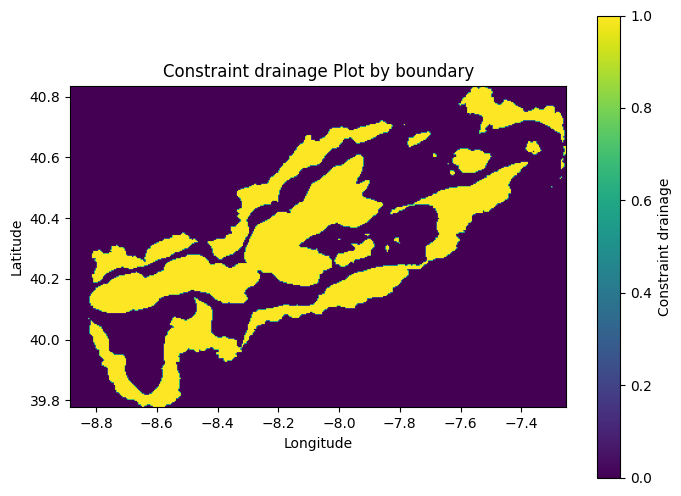

In [29]:
raster=gdal.Open(f'/content/drive/MyDrive/cons_test/cons_drainage.tif')
a_s=raster.GetRasterBand(1).ReadAsArray()
plt.figure(figsize=(8,6))
plt.imshow(raster.GetRasterBand(1).ReadAsArray(),extent=(xmin, xmax, ymin, ymax), origin='upper', cmap='viridis')
plt.colorbar(label='Constraint drainage')
plt.title('Constraint drainage Plot by boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Main Overlay Function

In [96]:
#constraint mapping + overlay

def overlay_constraint_raster(all_file,dict):
  # all constrain map location
  all_cons_map_loc=[]

  for file in all_file:

    print(file)
    name=file.split('.')[0].split('/')[-1]   #change according to location
    name=name.split('_')[1]
    #print(name)
    print(f'This is {name} file')
    if name in dict:
      #use categorical function
      print(f'This is {name} file')
      keep_val=input('Write down the category names that you want to keep in constraint mapping.use comma seperated value')
      keep_value=keep_val.split(',')
      #call the function
      #cons_cat(file,keep_value,dict,name)
      output_name='cons'+'_'+name
      output_file=f'/content/drive/MyDrive/cons_test/{output_name}.tif'

      cons_cate(file,keep_value,dict,name,output_file)
      all_cons_map_loc.append(output_file)

    else:    #numerical

      lower_bound=float(input('Insert your lower bound'))
      lower_sign=input('insert your lower sign')
      upper_sign=input('insert your upper sign')
      upper_bound=float(input('insert your upper bound'))

      output_name='cons'+'_'+name
      output_file=f'/content/drive/MyDrive/cons_test/{output_name}.tif'
      all_cons_map_loc.append(output_file)
      cons_nume(lower_sign,lower_bound,upper_bound,upper_sign,file,output_file)


  print(all_cons_map_loc)
  #overlay operation
  #access the first element
  path=all_cons_map_loc[0]
  raster=gdal.Open(path)
  final_arr=raster.GetRasterBand(1).ReadAsArray()
  gt = raster.GetGeoTransform()
  proj = raster.GetProjection()

  #Change the final_arr compare to other
  for i in range(0,len(all_cons_map_loc)):
    new_ras=gdal.Open(all_cons_map_loc[i])
    new_arr=new_ras.GetRasterBand(1).ReadAsArray()
    final_arr[new_arr==0]=0

  final_overlay_location=f'/content/drive/MyDrive/cons_test/cons_overlay.tif'

  outds = gdal.GetDriverByName('Gtiff').Create(final_overlay_location, final_arr.shape[1], final_arr.shape[0], 1, gdal.GDT_Float64, ['COMPRESS=LZW'])
  outds.SetGeoTransform(gt)
  outds.SetProjection(proj)
  outds.GetRasterBand(1).WriteArray(final_arr)
  outds.GetRasterBand(1).SetNoDataValue(np.nan)
  outds.FlushCache()
  outds = None

  print('end')

In [63]:
#  U,Bk,Bg,Be,I,WR,Bd,Lc,Re,Lv
# upper_sign='greater than equal'  upper_bound=50  upper_sign='greater than'  lower_bound=20    lower_sign='less than equal'

In [100]:
overlay_constraint_raster(all_file,list_a)

/content/drive/MyDrive/output_13nov/clip_drainage_density_by_study_area.tif
This is drainage file
Insert your lower bound40
insert your lower signgreater than
insert your upper signless than
insert your upper bound120
/content/drive/MyDrive/output_13nov/clip_soil_by_study_area.tif
This is soil file
This is soil file
Write down the category names that you want to keep in constraint mapping.use comma seperated valueBg,Be,I,WR,Bd,Lc,Re,Lv
['/content/drive/MyDrive/cons_test/cons_drainage.tif', '/content/drive/MyDrive/cons_test/cons_soil.tif']
end


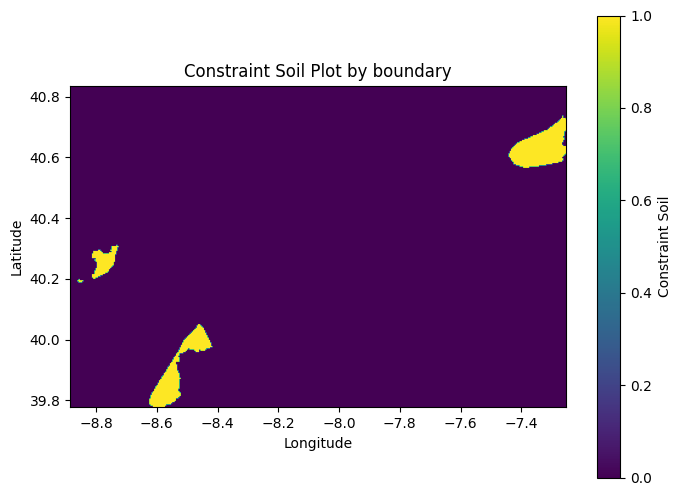

In [101]:
raster=gdal.Open(f'/content/drive/MyDrive/cons_test/cons_soil.tif')
arr_soil=raster.GetRasterBand(1).ReadAsArray()
plt.figure(figsize=(8,6))
plt.imshow(raster.GetRasterBand(1).ReadAsArray(),extent=(xmin, xmax, ymin, ymax), origin='upper', cmap='viridis')
plt.colorbar(label='Constraint Soil')
plt.title('Constraint Soil Plot by boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [102]:
arr_soil.shape

(264, 408)

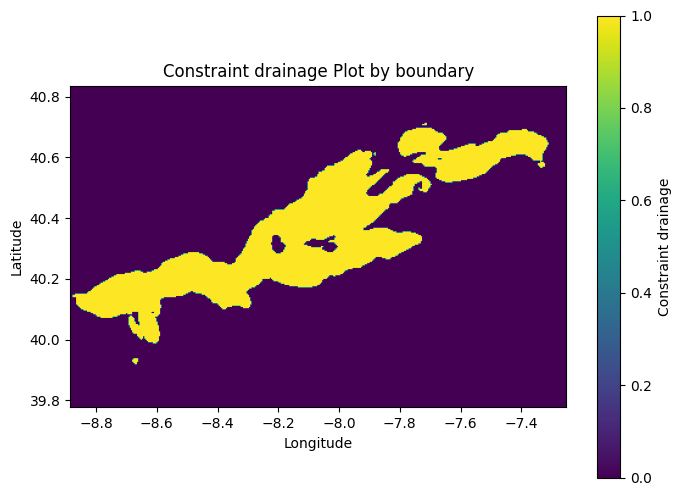

In [103]:
raster=gdal.Open(f'/content/drive/MyDrive/cons_test/cons_drainage.tif')
arr_drainage=raster.GetRasterBand(1).ReadAsArray()
plt.figure(figsize=(8,6))
plt.imshow(raster.GetRasterBand(1).ReadAsArray(),extent=(xmin, xmax, ymin, ymax), origin='upper', cmap='viridis')
plt.colorbar(label='Constraint drainage')
plt.title('Constraint drainage Plot by boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [104]:
arr_drainage.shape

(264, 408)

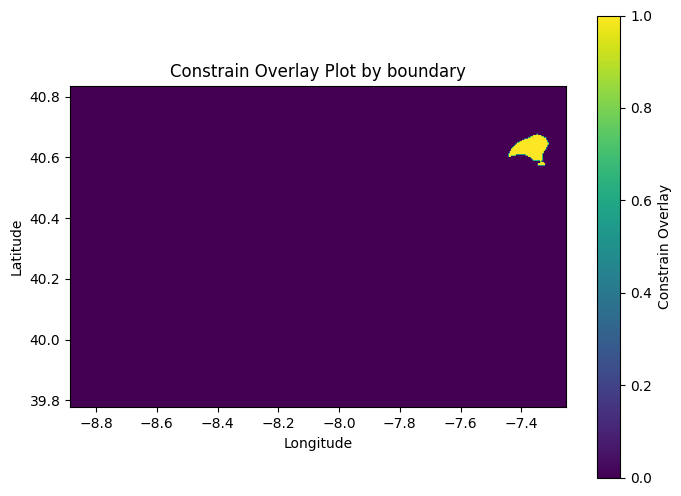

In [106]:
raster=gdal.Open(f'/content/drive/MyDrive/cons_test/cons_overlay.tif')
arr_overlay=raster.GetRasterBand(1).ReadAsArray()
plt.figure(figsize=(8,6))
plt.imshow(raster.GetRasterBand(1).ReadAsArray(),extent=(xmin, xmax, ymin, ymax), origin='upper', cmap='viridis')
plt.colorbar(label='Constrain Overlay')
plt.title('Constrain Overlay Plot by boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [107]:
arr_overlay.shape

(264, 408)

In [44]:
a=np.array([1,1,0,0,1,1,0,1])
b=np.array([1,0,0,1,1,0,0,1])
c=np.array([1,1,1,0,1,1,0,1])
l=[a,b,c]

In [45]:
#get 1st element
#then compare with other
a=l[0]
for i in range(0,len(l)):
  arr=l[i]
  a[arr==0]=0

print(a)


[1 0 0 0 1 0 0 1]
